## Figure 2
(a) Estimated solid ice discharge from Jakobshavn Isbræ, extracted from Mankoff et al. (2020b), with the shaded area representing the associated uncertainty. 

(b) Ice surface velocity at T, T5, T10, T15, T20 and T30, sampled from NASA’s MEaSUREs ITS_LIVE 6-day and 12-day image-pair velocities (Lei et al., 2022a). 

In [1]:
# IMPORT MODULES
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np 
import datetime

In [17]:
# DEFINE THE ITS_LIVE VELOCITY DATA VARIABLES.
ITS_LIVE_data = pd.read_csv(r'R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/its_live_sampled_6_12_day.csv')
POINT1_VELOCITY = ITS_LIVE_data['POINT_1_VELOCITY']
POINT2_VELOCITY = ITS_LIVE_data['POINT_2_VELOCITY']
POINT3_VELOCITY = ITS_LIVE_data['POINT_3_VELOCITY']
POINT4_VELOCITY = ITS_LIVE_data['POINT_4_VELOCITY']
POINT5_VELOCITY = ITS_LIVE_data['POINT_5_VELOCITY']
POINT6_VELOCITY = ITS_LIVE_data['POINT_6_VELOCITY']
POINT7_VELOCITY = ITS_LIVE_data['POINT_7_VELOCITY']
ITS_LIVE_data['mid_date'] = pd.to_datetime(ITS_LIVE_data['mid_date'], format='%Y/%m/%d')

# DEFINE THE ICE DISCHARGE DATA VARIABLES
discharge_file = 'R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/ice_discharge_mankoff_2020/jakobshavn_g184_discharge_2018_2023.csv'
df = pd.read_csv(discharge_file)
discharge = df['discharge']
error = df['error']
coverage = df['coverage']
date = pd.to_datetime(df['date'], format='%Y/%m/%d')
mask = coverage > 0.5

# CALCULATE THE MEAN ANNUAL DISCHARGE 
discharge_series = pd.Series(discharge.values, index=date)
annual_mean_discharge = discharge_series.resample('Y').mean()

# CALCULATE THE MEAN ANNUAL VELOCITY AT T (POINT 1)
POINT1_VELOCITY_series = pd.Series(POINT1_VELOCITY.values, index=ITS_LIVE_data['mid_date'])
annual_mean_velocity = POINT1_VELOCITY_series.resample('Y').mean()
annual_mean_velocity = annual_mean_velocity[:-1] # remove the last year as it is incomplete

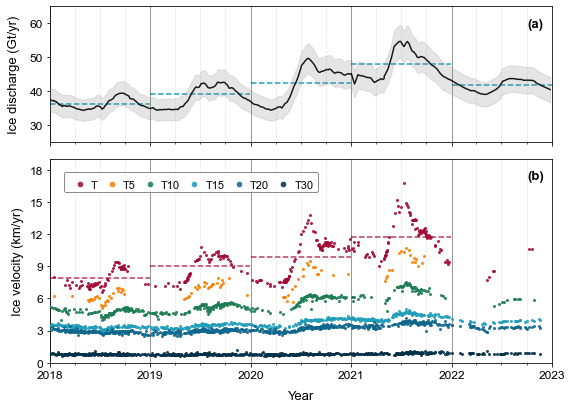

In [22]:
# PRODUCE A FIGURE SHOWING (A) ICE DISCHARGE AND (B) ICE VELOCITY.
plt.rcParams["font.family"] = "Arial"
height_ratios = [2, 3]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 6), gridspec_kw={'height_ratios': height_ratios})
plt.subplots_adjust(hspace=0.1, top = 0.95)
ytitle_discharge = 'Ice discharge (Gt/yr)'
ytitle_velocity = 'Ice velocity (km/yr)'
xtitle = 'Year'

# DEFINE THE FORMATTING FOR THE X-TICKS
year_locator = mdates.YearLocator(base=1, month=1, day=1)
min_x_value = pd.to_datetime('2018-01-01', format='%Y-%m-%d')
max_x_value = pd.to_datetime('2023-01-01', format='%Y-%m-%d')
three_month_intervals = mdates.MonthLocator(interval=3)

# APPLY TO BOTH AXES 
ax1.xaxis.set_major_locator(year_locator)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax1.set_xlim(min_x_value, max_x_value)
ax1.xaxis.set_minor_locator(three_month_intervals)
ax2.xaxis.set_major_locator(year_locator)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax2.set_xlim(min_x_value, max_x_value)
ax2.xaxis.set_minor_locator(three_month_intervals)

# PLOT 1 - ICE DISCHARGE 
ax1.grid(axis = 'x', alpha=0.5, linestyle='-', color='black')
ax1.set_xticklabels([])
ax1.set_ylim(25, 65)
ax1.plot(date, discharge, 'black', label='Discharge')
ax1.fill_between(date, discharge - error, discharge + error, alpha=0.2, color='gray', zorder=3)
ax1.xaxis.grid(True, which='minor', linestyle='--', alpha=0.3)
ax1.tick_params(axis='y', labelsize=12)
ax1.annotate("(a)", xy=(0.95, 0.85), xycoords="axes fraction", fontsize=13, color="black", weight="bold")
ax1.set_ylabel('Ice discharge (Gt/yr)', fontsize=13, rotation=90, labelpad=10)

for year, mean in zip(annual_mean_discharge.index.year, annual_mean_discharge):
    start_of_year = pd.to_datetime(f'{year}-01-01')
    end_of_year = pd.to_datetime(f'{year}-12-31')
    ax1.hlines(y=mean, xmin=start_of_year, xmax=end_of_year, colors='#219ebc', linestyles='--', linewidth=1.5, zorder=1)

# PLOT 2 - ICE VELOCITY 
ax2.grid(axis = 'x', alpha=0.5, linestyle='-', color='black')
ax2.xaxis.grid(True, which='minor', linestyle='--', alpha=0.3)
ax2.scatter(ITS_LIVE_data['mid_date'], POINT1_VELOCITY/1000, color='#a30b37', s=4, marker='o', alpha=0.85, label='T', zorder=20)
ax2.scatter(ITS_LIVE_data['mid_date'], POINT2_VELOCITY/1000, color='#f77f00', s=4, marker='o', alpha=0.85, label='T5', zorder=20)
ax2.scatter(ITS_LIVE_data['mid_date'], POINT3_VELOCITY/1000, color='#1c7c54', s=4, marker='o', alpha=0.85, label='T10', zorder=20)
ax2.scatter(ITS_LIVE_data['mid_date'], POINT4_VELOCITY/1000, color='#219ebc', s=4, marker='o', alpha=0.85, label='T15', zorder=20)
ax2.scatter(ITS_LIVE_data['mid_date'], POINT5_VELOCITY/1000, color='#10678e', s=4, marker='o', alpha=0.85, label='T20', zorder=20)
ax2.scatter(ITS_LIVE_data['mid_date'], POINT7_VELOCITY/1000, color='#023047', s=4, marker='o', alpha=0.85, label='T30', zorder=20)
ax2.set_ylim(0, 19)
ax2.set_yticks(np.arange(0, 18+2, 3))
ax2.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='x', labelsize=12)
ax2.set_ylabel('Ice velocity (km/yr)', fontsize=13, rotation=90, labelpad=6)
ax2.set_xlabel(xtitle, labelpad=10, fontsize=13)
ax2.annotate("(b)", xy=(0.95, 0.9), xycoords="axes fraction", fontsize=13, color="black", weight="bold")

for year, mean in zip(annual_mean_velocity.index.year, annual_mean_velocity/1000):
    start_of_year = pd.to_datetime(f'{year}-01-01')
    end_of_year = pd.to_datetime(f'{year}-12-31')
    ax2.hlines(y=mean, xmin=start_of_year, xmax=end_of_year, colors='#a30b37', alpha=0.8, linestyles='--', linewidth=1.5, zorder=1)

lines2, labels2 = ax2.get_legend_handles_labels()
legend = ax2.legend(lines2, labels2, loc='upper left', ncol=6, columnspacing=0.3, markerscale=2.3, frameon=True, framealpha=1, handletextpad=0.01, handleheight=0.1, fontsize =11, facecolor='white', borderaxespad = 0.8, borderpad=0.45, fancybox=True, bbox_to_anchor=(0.01, 0.98))
legend.get_frame().set_edgecolor('gray')
legend.get_frame().set_alpha(0.9)
legend.set_zorder(20)
for text in legend.get_texts():
    text.set_va('center')

#plt.savefig('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/figures/figure_2.png', dpi=300)